In [5]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [6]:
train_labels = []
train_samples = []

In [7]:
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(66,100)
    train_samples.append(random_older)
    train_labels.append(1)
    
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

In [8]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

C:\Users\Jhon GIl Sepulveda\Anaconda3\envs\keras\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [1]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Using TensorFlow backend.


In [2]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.0402 - acc: 0.9984 - val_loss: 3.0933 - val_acc: 0.5238
Epoch 2/20
 - 0s - loss: 0.0394 - acc: 1.0000 - val_loss: 3.1346 - val_acc: 0.5238
Epoch 3/20
 - 0s - loss: 0.0386 - acc: 0.9979 - val_loss: 3.1634 - val_acc: 0.5238
Epoch 4/20
 - 0s - loss: 0.0381 - acc: 1.0000 - val_loss: 3.2073 - val_acc: 0.5238
Epoch 5/20
 - 0s - loss: 0.0373 - acc: 1.0000 - val_loss: 3.2391 - val_acc: 0.5238
Epoch 6/20
 - 0s - loss: 0.0366 - acc: 0.9995 - val_loss: 3.2829 - val_acc: 0.5238
Epoch 7/20
 - 0s - loss: 0.0359 - acc: 0.9979 - val_loss: 3.3091 - val_acc: 0.5238
Epoch 8/20
 - 0s - loss: 0.0354 - acc: 1.0000 - val_loss: 3.3339 - val_acc: 0.5238
Epoch 9/20
 - 0s - loss: 0.0347 - acc: 1.0000 - val_loss: 3.3829 - val_acc: 0.5238
Epoch 10/20
 - 0s - loss: 0.0342 - acc: 0.9989 - val_loss: 3.4032 - val_acc: 0.5238
Epoch 11/20
 - 0s - loss: 0.0338 - acc: 0.9974 - val_loss: 3.4376 - val_acc: 0.5238
Epoch 12/20
 - 0s - loss: 0.0332 - acc

In [39]:
test_labels = []
test_samples= []

In [40]:
for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [41]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [42]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

C:\Users\Jhon GIl Sepulveda\Anaconda3\envs\keras\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [43]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [33]:
for i in predictions:
    print(i)

[0.9971464 0.0028536]
[6.3268824e-05 9.9993670e-01]
[9.9991524e-01 8.4777159e-05]
[1.3497501e-04 9.9986506e-01]
[0.9742355 0.0257645]
[6.3353765e-04 9.9936646e-01]
[9.9982834e-01 1.7159180e-04]
[2.9655797e-05 9.9997032e-01]
[9.9989378e-01 1.0623997e-04]
[8.3873956e-06 9.9999166e-01]
[9.9987066e-01 1.2936066e-04]
[0.04572389 0.9542761 ]
[9.999114e-01 8.851173e-05]
[0.02674628 0.9732537 ]
[0.9742355 0.0257645]
[3.0537685e-06 9.9999690e-01]
[9.9988341e-01 1.1654933e-04]
[2.8792676e-04 9.9971205e-01]
[9.9976057e-01 2.3944155e-04]
[1.7375409e-04 9.9982625e-01]
[0.9950352  0.00496482]
[0.00116273 0.9988373 ]
[9.99893785e-01 1.06239866e-04]
[6.3353765e-04 9.9936646e-01]
[9.9990427e-01 9.5715186e-05]
[8.2537549e-04 9.9917465e-01]
[9.99893785e-01 1.06239866e-04]
[1.0484987e-04 9.9989510e-01]
[9.9990046e-01 9.9533929e-05]
[2.8792705e-04 9.9971205e-01]
[9.9989092e-01 1.0904716e-04]
[2.2367212e-04 9.9977630e-01]
[9.9989092e-01 1.0904716e-04]
[1.7894423e-05 9.9998212e-01]
[9.9964905e-01 3.5088920e-

In [44]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)

In [35]:
for i in rounded_predictions:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [45]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [46]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [51]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matriz', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matriz")
    else:
        print('Confusion matriz, without normalization')
        
    print(cm)
    thresh = cm.max()
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

Confusion matriz, without normalization
[[200  10]
 [ 10 200]]


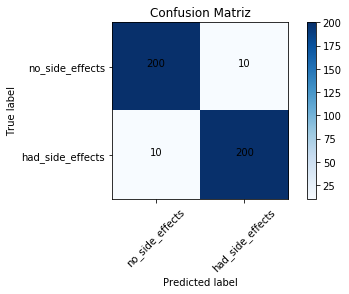

In [52]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matriz')